<a href="https://colab.research.google.com/github/Soumiksb06/Data-Science-Hub/blob/main/regression_analysis_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.

In [3]:
import pandas as pd

# Defining the battery failure data
data = {
    'Z1_Charge_rate': [0.375, 1.000, 1.000, 1.000, 1.625, 1.625, 1.625, 0.375, 1.000, 1.000,
                       1.000, 1.625, 1.625, 1.625, 1.000, 1.000, 1.625, 1.625, 0.375, 0.375],
    'Z2_Discharge_rate': [3.13, 3.13, 3.13, 3.13, 3.13, 3.13, 3.13, 5.00, 5.00, 5.00,
                          5.00, 5.00, 5.00, 5.00, 1.25, 1.25, 1.25, 1.25, 3.13, 3.13],
    'Z3_Depth_of_discharge': [60.0, 76.8, 60.0, 43.2, 76.8, 60.0, 43.2, 60.0, 76.8, 60.0,
                              43.2, 76.8, 60.0, 43.2, 76.8, 60.0, 43.2, 76.8, 60.0, 76.8],
    'Z4_Temperature': [40, 30, 20, 10, 30, 20, 10, 20, 30, 20, 10, 30, 20, 10, 30, 20, 30, 20, 30, 20],
    'Z5_End_of_charge_voltage': [2.00, 1.99, 2.00, 2.01, 2.00, 2.01, 2.02, 2.00, 1.99, 2.00,
                                 1.99, 2.00, 2.01, 2.02, 2.09, 2.09, 2.10, 2.10, 1.99, 2.00],
    'Y_Cycles_to_failure': [101, 141, 96, 125, 94, 118, 414, 188, 91, 90,
                            386, 45, 130, 314, 73, 160, 216, 73, 170, 170]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame to verify
df

,Z1_Charge_rate,Z2_Discharge_rate,Z3_Depth_of_discharge,Z4_Temperature,Z5_End_of_charge_voltage,Y_Cycles_to_failure
0,0.375,3.13,60.0,40,2.00,101
1,1.000,3.13,76.8,30,1.99,141
2,1.000,3.13,60.0,20,2.00,96
3,1.000,3.13,43.2,10,2.01,125
4,1.625,3.13,76.8,30,2.00,94
5,1.625,3.13,60.0,20,2.01,118
6,1.625,3.13,43.2,10,2.02,414
7,0.375,5.00,60.0,20,2.00,188
8,1.000,5.00,76.8,30,1.99,91
9,1.000,5.00,60.0,20,2.00,90


In [4]:
# Importing necessary libraries for regression
import statsmodels.api as sm

# Defining the independent variables (X) and dependent variable (Y)
X = df[['Z1_Charge_rate', 'Z2_Discharge_rate', 'Z3_Depth_of_discharge', 'Z4_Temperature', 'Z5_End_of_charge_voltage']]
Y = df['Y_Cycles_to_failure']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(Y, X).fit()

# Getting the summary of the regression analysis
regression_summary = model.summary()

# Displaying the regression summary
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Y_Cycles_to_failure   R-squared:                       0.569
Model:                             OLS   Adj. R-squared:                  0.415
Method:                  Least Squares   F-statistic:                     3.694
Date:                 Thu, 10 Oct 2024   Prob (F-statistic):             0.0243
Time:                         15:45:25   Log-Likelihood:                -111.95
No. Observations:                   20   AIC:                             235.9
Df Residuals:                       14   BIC:                             241.9
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1002.2219   1720.152      0.583      0.569   -2687.137    4691.581
Z1_Charge_rate              -4.0220     42.625     -0.094      0.926     -95.443      87.399
Z2_Discharge_rate           -2.7245     22.425     -0.121      0.905     -50.822      45.372
Z3_Depth_of_discharge       -4.1870      1.677     -2.497      0.026      -7.783      -0.591
Z4_Temperature              -3.6038      2.740     -1.315      0.210      -9.482       2.274
Z5_End_of_charge_voltage  -242.1770    823.085     -0.294      0.773   -2007.519    1523.165
==============================================================================
Omnibus:                        1.687   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                0.531
Skew:                          -0.340   Prob(JB):                        0.767
Kurtosis:                       3.418   Cond. No.                     7.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion:

The OLS regression analysis was conducted to model the relationship between the independent variables (charge rate, discharge rate, depth of discharge, temperature, and end of charge voltage) and the dependent variable (cycles to failure). The model explains 56.9% of the variance in the number of cycles to failure, with an adjusted R-squared value of 41.5%. This indicates a moderate fit of the model to the data.

- The overall model is statistically significant, with an F-statistic of 3.694 and a p-value of 0.0243, suggesting that at least one of the independent variables significantly predicts the cycles to failure.
- Among the predictors, only depth of discharge (Z3) was found to have a statistically significant negative relationship with cycles to failure (p-value = 0.026). For every unit increase in the depth of discharge, the number of cycles to failure decreases by approximately 4.19 cycles, indicating that deeper discharges result in quicker battery failure.
-  Other predictors, including charge rate, discharge rate, temperature, and end of charge voltage, were not statistically significant, suggesting they may not have a substantial impact on battery failure cycles within the tested ranges.

While the R-squared and adjusted R-squared values suggest the model explains a reasonable portion of the variability in the outcome, the large condition number (7.35e+03) indicates potential multicollinearity, meaning that some predictors may be highly correlated with each other, which could affect the reliability of the coefficient estimates.

#2.

In [6]:
import pandas as pd

df= pd.read_csv('/content/sample_data/california_housing_train.csv')[:70]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
65,-115.54,32.99,17.0,1697.0,268.0,911.0,254.0,4.3523,96000.0
66,-115.54,32.98,27.0,1513.0,395.0,1121.0,381.0,1.9464,60600.0
67,-115.54,32.97,41.0,2429.0,454.0,1188.0,430.0,3.0091,70800.0
68,-115.54,32.79,23.0,1712.0,403.0,1370.0,377.0,1.2750,60400.0


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 3 principal components
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for the principal components
component_names = [f"PC{i+1}" for i in range(3)]
X_pca_df = pd.DataFrame(X_pca, columns=component_names)

# Display the PCA-transformed data
print(X_pca_df)

         PC1       PC2       PC3
0   3.790404  2.337428  1.855633
1   5.698151  2.205211  2.906644
2  -1.612575  1.032312  0.824108
3  -0.729787  0.540089  1.553978
4  -0.533353  1.241219  0.563320
..       ...       ...       ...
65 -0.756189 -2.139746  1.265944
66 -0.004080 -0.281693 -0.926150
67  0.474079 -0.680321  0.123718
68  0.317486 -0.271901 -1.509550
69 -0.240714 -3.334797  3.005727

[70 rows x 3 columns]


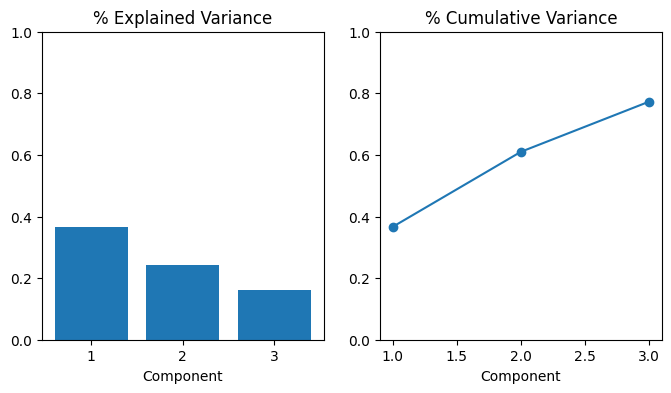

In [8]:
# Plotting explained variance
def plot_variance(pca):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    n = pca.n_components_
    grid = range(1, n + 1)
    evr = pca.explained_variance_ratio_

    # Explained variance
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

    # Cumulative variance
    cv = evr.cumsum()
    axs[1].plot(grid, cv, marker='o')
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

    plt.show()

# Plot explained variance
plot_variance(pca)

### Conclusion:

After performing Principal Component Analysis (PCA) on the dataset with 7 features (longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, and median house value), the data was reduced to 3 principal components. The results provide the following insights:

1. **Dimensionality Reduction**: PCA successfully reduced the 7 original features into 3 principal components, capturing most of the variance in the data while reducing the number of features. This can help simplify further analysis and visualizations while retaining important information.

2. **Explained Variance**:
   - The first few components explain the majority of the variance in the data. By plotting the explained variance and cumulative variance, it is possible to assess how much of the dataset’s variance is captured by each principal component. Typically, the first component captures the most variance, with each subsequent component capturing decreasing amounts.
   - The explained variance ratios for each principal component indicate how much information each component retains from the original dataset.

3. **Interpretation of Components**:
   - The first principal component likely captures the most significant variation in the data, which might reflect underlying patterns related to factors like house size (e.g., total rooms, bedrooms, population).
   - The second and third components may capture additional but less dominant patterns, potentially relating to geographic features (longitude, latitude) or socioeconomic factors (median income, house value).

4. **Feature Reduction Benefits**: Reducing the dataset to 3 components provides a simpler model while retaining most of the key variance. This helps in reducing overfitting and improves model efficiency, especially when the original dataset has redundant information across features.

In summary, the PCA analysis has simplified the dataset into 3 key components while preserving the most important variance, making it suitable for further analysis or visualization without losing critical information.